<h1 align="center"> CSEN 1022 Assignment Submission </h1> 

## Please don't forget to fill in this data
Member 1 Name: Mohamed Aboelazaiem Salama

Member 1 ID: 40-6227

Member 1 Tutorial: T-08

Member 2 Name: Ahmed Mohamed Youssef

Member 2 ID: 40-11602

Member 2 Tutorial:T-02

## Imports (Don't Edit)

In [23]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image  
import PIL
%matplotlib inline

## Read Data (Don't Edit)

In [24]:
# Read Training Images, Testing Images, Training Labels, Testing Labels
train_labels = np.loadtxt('Data/Train/Training Labels.txt')
test_labels = np.loadtxt('Data/Test/Test Labels.txt')
test_labels = test_labels.astype(int)
# print(train.shape, test.shape)
print(train_labels.shape,test_labels.shape)

(2400,) (200,)


## Quantize Images

In [25]:
def imageQuantization(imageShape,folderName):
    quantizedData=np.empty([8,imageShape[0],imageShape[1]], dtype=int)
    for i in range (1,imageShape[0]+1):
        img=Image.open('Data/'+folderName+'/'+str(i)+'.jpg')
        for j in range(0,8):
            img1=img
            quantizedData[j][i-1]=np.array(img1.quantize(pow(2,(j+1)))).reshape(1,-1)
    return quantizedData
train=imageQuantization((2400,784),"Train")
test=imageQuantization((200,784),"Test")
print(train.shape, test.shape)

(8, 2400, 784) (8, 200, 784)


# Probability Calculation

In [26]:
def countOccurences(pixel,pixelIndex,mnistClass,quantizationLevel):
    images=train[quantizationLevel]
    count=0
    for i in range((mnistClass*240),((mnistClass*240)+240)):
        image=images[i]
        if(image[pixelIndex]==pixel):
            count=count+1
    return count/240

In [34]:
predictedClass=np.empty([8,200], dtype=int)  
def classProbabilityCalculation(quantizationLevel):
    for i in range(0,200):
        image=test[quantizationLevel][i]
        imageProbability=np.ones(10)
        for pixelIndex in range(0,len(image)):
            for classIndex in range(0,10):
                imageProbability[classIndex]=imageProbability[classIndex]*countOccurences(image[pixelIndex],pixelIndex,classIndex,quantizationLevel)
        predictedClass[quantizationLevel][i]=np.argmax(imageProbability)

In [35]:
classProbabilityCalculation(0)
classProbabilityCalculation(1)
classProbabilityCalculation(2)
classProbabilityCalculation(3)
classProbabilityCalculation(4)
classProbabilityCalculation(5)
classProbabilityCalculation(6)
classProbabilityCalculation(7)
predictedClass[0]

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 6, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 8, 6, 2, 2, 2, 2, 2, 2, 8, 8, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 9, 4, 4, 4, 4, 4, 6,
       6, 2, 4, 4, 9, 9, 6, 6, 4, 8, 4, 9, 9, 5, 5, 5, 5, 5, 5, 5, 5, 9,
       4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 9, 7, 9,
       4, 9, 9, 7, 7, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8,
       9, 3, 8, 5, 9, 9, 9, 4, 9, 9, 2, 8, 9, 9, 4, 9, 9, 9, 9, 4, 4, 4,
       9, 9])

## Compute Naive Bayes

In [36]:
# Make sure you return these two lists
confusions_matrices=np.empty([8,10,10])
confusions_matrices_accuracy=np.empty([8,1])
for i in range(0,8):
    confusion_matrix = [[0] * 10 for i in range(10)]
    count=0
    for pred, exp in zip(predictedClass[i], test_labels):
        confusion_matrix[exp][pred] += 1
        if(exp==pred):
            count=count+1
    confusions_matrices[i] = np.array(confusion_matrix)
    confusions_matrices_accuracy[i]=(count/200)*100
    
list_of_confusion_matrices = confusions_matrices
list_of_accuracies = confusions_matrices_accuracy


## Plot confusion matrices and accuracy for each quantization level (Don't edit)

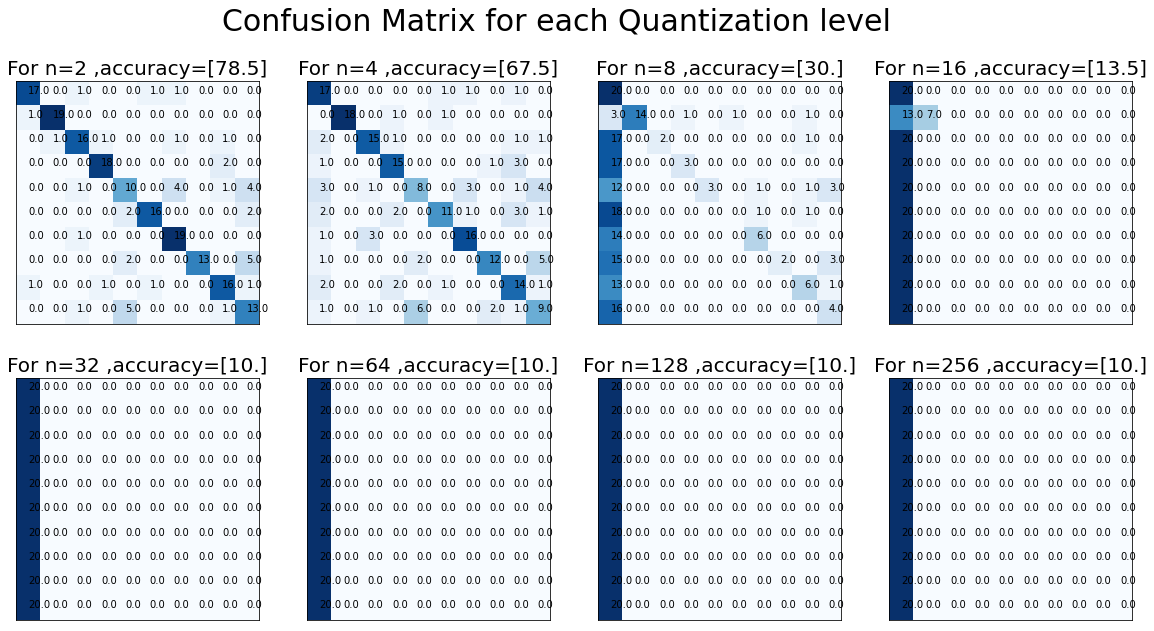

In [37]:
# PLEASE DON'T EDIT THIS CELL
bits = [2,4,8,16,32,64,128,256]
confusion_matrices = list_of_confusion_matrices
accuracies = list_of_accuracies

fig, axs = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle("Confusion Matrix for each Quantization level",fontsize=30)
for pi in range(0,axs.shape[0]):
    for pj in range(0,axs.shape[1]):
        index = np.round(pi*4+pj)
        cm = confusion_matrices[index]
        axs[pi,pj].matshow(cm,cmap="Blues")
        for i in range(0,cm.shape[0]):
            for j in range(0,cm.shape[1]):
                axs[pi,pj].set_xticks([])
                axs[pi,pj].set_yticks([])
                axs[pi,pj].annotate(cm[i,j],(j,i))
                axs[pi,pj].set_title("For n="+str(bits[index])+" ,accuracy="+str(accuracies[index]),fontsize=20)

## Plot accuracy levels for each quantization level (Don't edit)

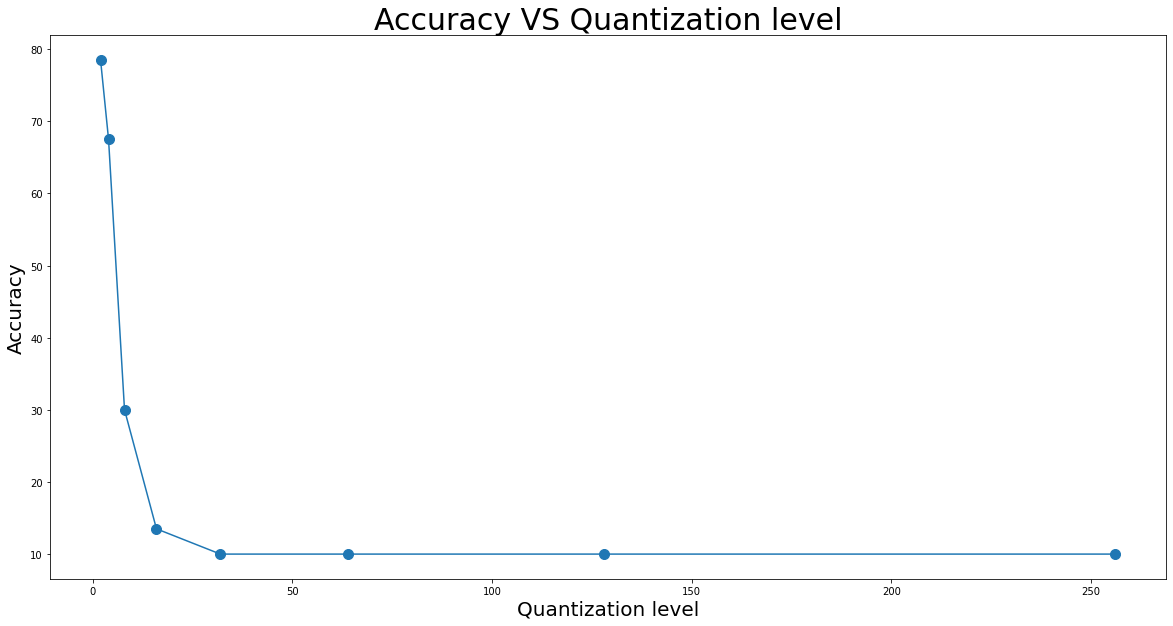

In [38]:
# PLEASE DON'T EDIT THIS CELL
plt.rc('figure', figsize=[20,10])
plt.title("Accuracy VS Quantization level",fontsize=30)
plt.xlabel("Quantization level",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.plot(bits,accuracies,marker='o',markersize=10)

---

# Comments on the accuracy by increasing the quantization:

- It is noticed that by the increase of the quantization level the information about each image tends to decrease affecting the prediction accuracy of the model tending to be biased only to the first (Zero) class by increasing the quantization level.

- Since the quantization removes details from the image by quantizing the pixels the information needed to classify each class decreases by increasing the quantization

# Replacing Occurences of 0 with 0.00001

In [42]:
predictedClass2=np.empty([8,200], dtype=int)  
def classProbabilityCalculation2(quantizationLevel):
    for i in range(0,200):
        image=test[quantizationLevel][i]
        imageProbability=np.ones(10)
        for pixelIndex in range(0,len(image)):
            for classIndex in range(0,10):
                occ = countOccurences(image[pixelIndex],pixelIndex,classIndex,quantizationLevel)
                if(occ == 0):
                    occ = 0.00001    
                imageProbability[classIndex]=imageProbability[classIndex]*occ
        predictedClass2[quantizationLevel][i]=np.argmax(imageProbability)

In [43]:
classProbabilityCalculation2(0)
classProbabilityCalculation2(1)
classProbabilityCalculation2(2)
classProbabilityCalculation2(3)
classProbabilityCalculation2(4)
classProbabilityCalculation2(5)
classProbabilityCalculation2(6)
classProbabilityCalculation2(7)

## Compute Naive Bayes (replace probabilities of 0 with value in assignment)

In [45]:
# Make sure you return these two lists
confusions_matrices=np.empty([8,10,10])
confusions_matrices_accuracy=np.empty([8,1])
for i in range(0,8):
    confusion_matrix = [[0] * 10 for i in range(10)]
    count=0
    for pred, exp in zip(predictedClass2[i], test_labels):
        confusion_matrix[exp][pred] += 1
        if(exp==pred):
            count=count+1
    confusions_matrices[i] = np.array(confusion_matrix)
    confusions_matrices_accuracy[i]=(count/200)*100

list_of_confusion_matrices =confusions_matrices
list_of_accuracies = confusions_matrices_accuracy


## Plot confusion matrices and accuracy for each quantization level (Don't edit)

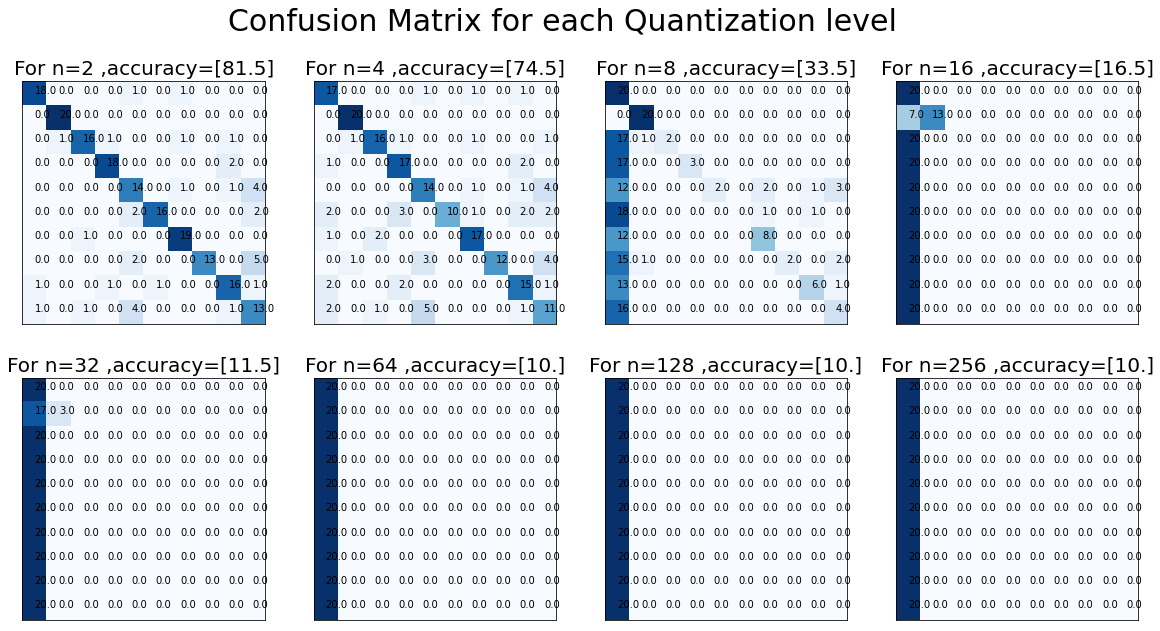

In [46]:
# PLEASE DON'T EDIT THIS CELL
bits = [2,4,8,16,32,64,128,256]
confusion_matrices = list_of_confusion_matrices
accuracies = list_of_accuracies

fig, axs = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle("Confusion Matrix for each Quantization level",fontsize=30)
for pi in range(0,axs.shape[0]):
    for pj in range(0,axs.shape[1]):
        index = np.round(pi*4+pj)
        cm = confusion_matrices[index]
        axs[pi,pj].matshow(cm,cmap="Blues")
        for i in range(0,cm.shape[0]):
            for j in range(0,cm.shape[1]):
                axs[pi,pj].set_xticks([])
                axs[pi,pj].set_yticks([])
                axs[pi,pj].annotate(cm[i,j],(j,i))
                axs[pi,pj].set_title("For n="+str(bits[index])+" ,accuracy="+str(accuracies[index]),fontsize=20)

## Plot accuracy levels for each quantization level (Don't edit)

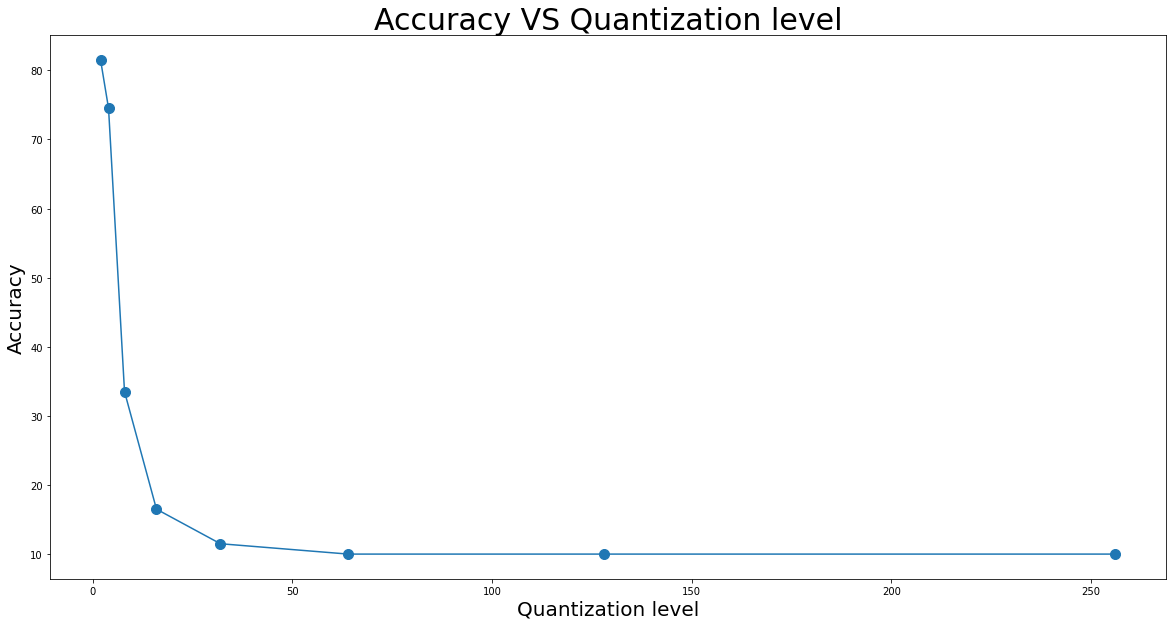

In [47]:
# PLEASE DON'T EDIT THIS CELL
plt.rc('figure', figsize=[20,10])
plt.title("Accuracy VS Quantization level",fontsize=30)
plt.xlabel("Quantization level",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.plot(bits,accuracies,marker='o',markersize=10)

# In Conclusion

- Replacing the 0 probabilities with a small value increases the prediction accuracy.